In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score, confusion_matrix
from sklearn import preprocessing 


import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("C:\\Users\\BOOK\\Documents\\DataScience_Project\\VLC-SGIT-25-014 - MODULE RESOURCE BUNDLE\\Module 1 - Finance\\Project 1 - Finance - Predictive Analytics\\Project 1 - Finance - Predictive Analytics\\Dataset\\loan.csv")
df.head()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


In [5]:
df.tail(3)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
4997,CUST-00003903,LN00000745,Home Loan,7476,0.064212,58,Full-time,High,452,Female,Single,High School,14-10-2022,29-10-2022,06-11-2022,08-04-2023,True
4998,CUST-00002276,LN00003075,Car Loan,52756,0.094914,12,Self-employed,Medium,728,Male,Married,PhD,21-07-2018,06-08-2018,20-08-2018,21-01-2019,False
4999,CUST-00003583,LN00002491,Personal Loan,91101,0.083821,52,Self-employed,Low,586,Male,Single,Master,03-08-2021,04-08-2021,07-08-2021,25-12-2021,False


In [47]:
df.columns

Index(['customer_id', 'loan_id', 'loan_type', 'loan_amount', 'interest_rate',
       'loan_term', 'employment_type', 'income_level', 'credit_score',
       'gender', 'marital_status', 'education_level', 'application_date',
       'approval_date', 'disbursement_date', 'due_date', 'default_status'],
      dtype='object')

In [6]:
df.shape

(5000, 17)

In [7]:
df.size

85000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

In [11]:
df.dtypes

customer_id           object
loan_id               object
loan_type             object
loan_amount            int64
interest_rate        float64
loan_term              int64
employment_type       object
income_level          object
credit_score           int64
gender                object
marital_status        object
education_level       object
application_date      object
approval_date         object
disbursement_date     object
due_date              object
default_status          bool
dtype: object

In [ ]:
# data cleaning

In [24]:
df.duplicated().any()

False

In [27]:
df.isnull().sum()*100/len(df)

customer_id          0.0
loan_id              0.0
loan_type            0.0
loan_amount          0.0
interest_rate        0.0
loan_term            0.0
employment_type      0.0
income_level         0.0
credit_score         0.0
gender               0.0
marital_status       0.0
education_level      0.0
application_date     0.0
approval_date        0.0
disbursement_date    0.0
due_date             0.0
default_status       0.0
dtype: float64

In [26]:
df.isna().sum()

customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64

In [177]:
#missing value
#---Applying Only on variables with NaN values
for i in df.columns[df.isnull().any(axis=0)]:    
    df[i].fillna(df[i].mean(),inplace=True)

In [ ]:
# Exporatory Analysis

In [31]:
df.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [82]:
# Analysis of two variable of the dataset

pd.crosstab(df['credit_score'], df['default_status'],margins =True)

default_status,False,True,All
credit_score,,,
300,10,2,12
301,5,4,9
302,6,1,7
303,5,3,8
304,7,3,10
...,...,...,...
846,6,1,7
847,6,1,7
848,12,2,14


Text(0.5, 0, 'credit_score')

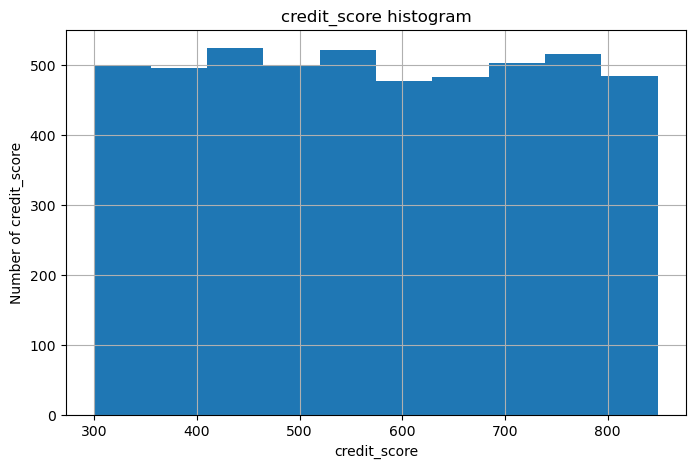

In [74]:
### Solution 5

df['credit_score'].hist(bins=10)
plt.title("credit_score histogram")
plt.ylabel('Number of credit_score')
plt.xlabel('credit_score')

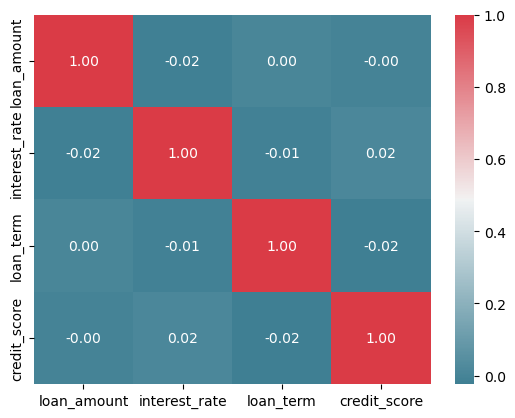

In [50]:
numeric_data = df.select_dtypes(include=['float64', 'int64']) # since our data has non numeric data as well

corr = numeric_data.corr() # Finding the correlation between different columns

#Generate Color Map, red & blue
colorsintheheatmap = sns.diverging_palette(220, 10, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colorsintheheatmap, annot=True, fmt=".2f")
plt.show()

In [172]:
data = df.head(50)


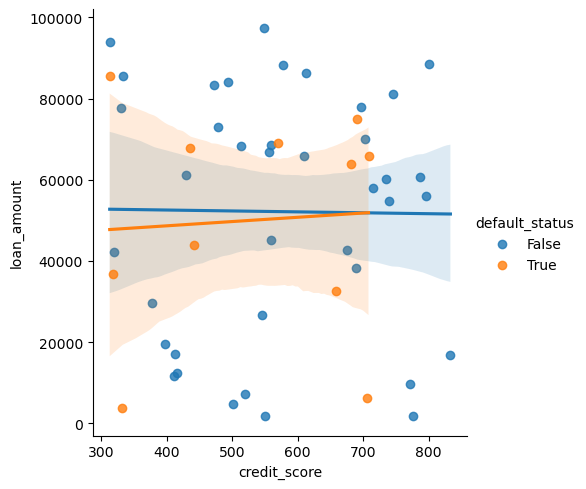

In [175]:
sns.lmplot(x="credit_score", y="loan_amount", hue="default_status", data=data)
plt.show()

In [169]:
df['employment_type'].unique()

array(['Self-employed', 'Full-time', 'Part-time'], dtype=object)

In [99]:
df['income_level'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [98]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [97]:
df['marital_status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [96]:
df['education_level'].unique()

array(['Master', 'Bachelor', 'High School', 'PhD'], dtype=object)

In [95]:
df['default_status'].unique()

array([False,  True])

In [31]:

label_encoder = preprocessing.LabelEncoder() 
 
 #convert categorical columns to numerical values

 
df['default_status']= label_encoder.fit_transform(df['default_status']) 
df['employment_type']= label_encoder.fit_transform(df['employment_type']) 
df['marital_status']= label_encoder.fit_transform(df['marital_status']) 
df['education_level']= label_encoder.fit_transform(df['education_level']) 
df['gender']= label_encoder.fit_transform(df['gender']) 
df['loan_type']= label_encoder.fit_transform(df['loan_type']) 

In [32]:
df.replace({'income_level':{'Medium': 1, 'Low': 0, 'High': 2}},inplace=True)




In [33]:
df.head(3)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,0,16795,0.051852,15,2,1,833,1,2,2,05-04-2018,23-04-2018,24-04-2018,14-08-2018,0
1,CUST-00004194,LN00002413,3,1860,0.089296,56,0,1,776,0,1,0,30-12-2022,31-12-2022,12-01-2023,05-04-2023,0
2,CUST-00003610,LN00000024,3,77820,0.070470,51,0,0,697,1,0,1,15-11-2019,18-11-2019,27-11-2019,24-02-2020,0


In [ ]:
# machine learning
# preparing data for logistic prediction

In [34]:
# Prepare the independent dataset (input)

x_logistic = df.drop(columns=['default_status','customer_id','loan_id',
                      'application_date','approval_date','disbursement_date','due_date'])
x_logistic.head(3)

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level
0,0,16795,0.051852,15,2,1,833,1,2,2
1,3,1860,0.089296,56,0,1,776,0,1,0
2,3,77820,0.070470,51,0,0,697,1,0,1


In [35]:
# Prepare the dependent dataset (output)

y_logistic = df['default_status']
y_logistic

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    1
4998    0
4999    0
Name: default_status, Length: 5000, dtype: int64

In [36]:
#  Create the model

logistic_model = LogisticRegression(max_iter=1000)

In [38]:
# Split the model into test and training data

x_logistic_train, x_logistic_test, y_logistic_train, y_logistic_test = train_test_split(x_logistic, y_logistic, test_size=0.2)

In [39]:
x_logistic_train.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level
3011,0,96850,0.106498,23,0,1,634,0,1,1
1125,2,12302,0.088741,26,2,1,752,1,1,0
2317,2,35068,0.074365,14,1,0,538,1,0,0
1996,1,84847,0.075837,31,2,2,755,1,1,0
4931,0,38158,0.089250,25,2,1,696,1,2,1


In [11]:
x_logistic_test.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level
2886,Education Loan,96286,0.082012,50,Part-time,Low,543,Male,Single,Master
1320,Personal Loan,32480,0.107833,34,Full-time,Medium,764,Male,Single,PhD
1087,Home Loan,88388,0.083972,59,Part-time,Low,691,Female,Divorced,Master
2221,Home Loan,36643,0.077242,35,Self-employed,Low,699,Male,Divorced,Master
4626,Car Loan,80650,0.079139,40,Self-employed,Medium,670,Male,Married,Master


In [40]:
y_logistic_train.head()

3011    0
1125    1
2317    0
1996    1
4931    1
Name: default_status, dtype: int64

In [41]:
y_logistic_test.head()

4282    0
2975    0
2196    0
66      0
1088    0
Name: default_status, dtype: int64

In [42]:
#  Train the model

logistic_model.fit(x_logistic_train, y_logistic_train)

LogisticRegression(max_iter=1000)

In [43]:
# Make predictions
# the dependent dataset (output), 'defaulter_status' column, False : 0, True : 1


logistic_predictions = logistic_model.predict(x_logistic_test)

logistic_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
# Evaluate the model

logistic_accuracy = accuracy_score(y_logistic_test, logistic_predictions)
precision = precision_score(y_logistic_test, logistic_predictions)
recall = recall_score(y_logistic_test, logistic_predictions)

print(f"Accuracy ((TP+TN)/Total): {round(logistic_accuracy,2)}")
print(f"Precision (TP/Predicted 1): {round(precision, 2)}")
print(f"Recall (TP/Actual 1): {round(recall,2)}")



Accuracy ((TP+TN)/Total): 0.8
Precision (TP/Predicted 1): 0.0
Recall (TP/Actual 1): 0.0


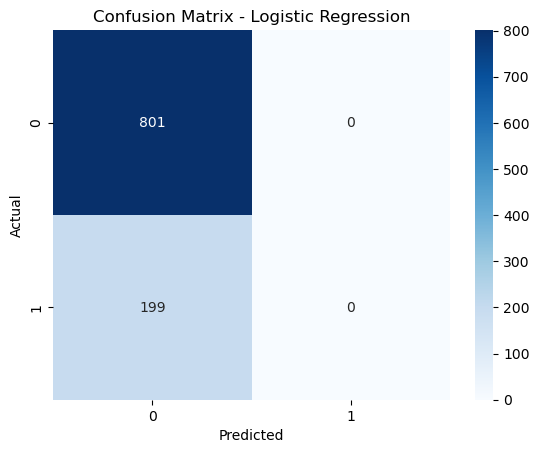

In [48]:
# Confusion Matrix Visualization

sns.heatmap(confusion_matrix(y_logistic_test, logistic_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()